###**Importing libraries & Datasets**

In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

####**For text analysis, we will use NLTK(Natural Language ToolKit) library, and from that we will be requiring stopword.**

In [4]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


####**Here, Stop words are the most frequently used words in a natural language like in, on, a, an, the, etc.**

In [5]:
data = pd.read_csv('/content/flipkart_data.csv')
data.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


###**Preprocessing**

In [6]:
pd.unique(data['rating'])

array([5, 4, 1, 3, 2])

<Axes: xlabel='rating', ylabel='count'>

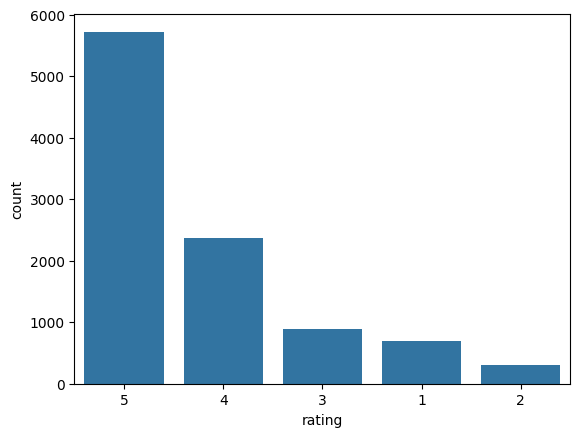

In [7]:
sns.countplot(data=data,x='rating',order=data.rating.value_counts().index)

In [17]:
# For Label
pos_neg = []
for i in range(len(data['rating'])):
  if data['rating'][i] >= 5:
    pos_neg.append(1)
  else:
    pos_neg.append(0)

data['label'] = pos_neg

In [18]:
nltk.download('punkt')
from tqdm import tqdm

def preprocess_text(text):
  preprocessed_text = []
  for sentence in tqdm(text):
    # It will remove punctuations mark
    sent = re.sub(r"[^\w\s]", "", sentence)

    # Converting lowecase and removing stopwords
    preprocessed_text.append(" ".join(token.lower() for token in nltk.word_tokenize(sentence)
     if token.lower() not in set(stopwords.words('english'))))
  return preprocessed_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


####**'punkt' is a tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences.**

In [19]:
preprocessed_review = preprocess_text(data['review'].values)
data['review'] = preprocessed_review

100%|██████████| 9976/9976 [00:15<00:00, 648.57it/s] 


In [20]:
data.head()

,review,rating,label
0,nice produt like design lot easy carry looked ...,5,1
1,awesome soundvery pretty see nd sound quality ...,5,1
2,awesome sound quality pros 78 hrs battery life...,4,0
3,think good product per quality also design qui...,5,1
4,awesome bass sound quality good bettary long l...,5,1


###**Analysis of the Data**

In [21]:
data['label'].value_counts()

,count
label,
1,5726
0,4250


####**To have the better picture of the importance of the words let's create the wordcloud of all world with label = 1 or positive label.**

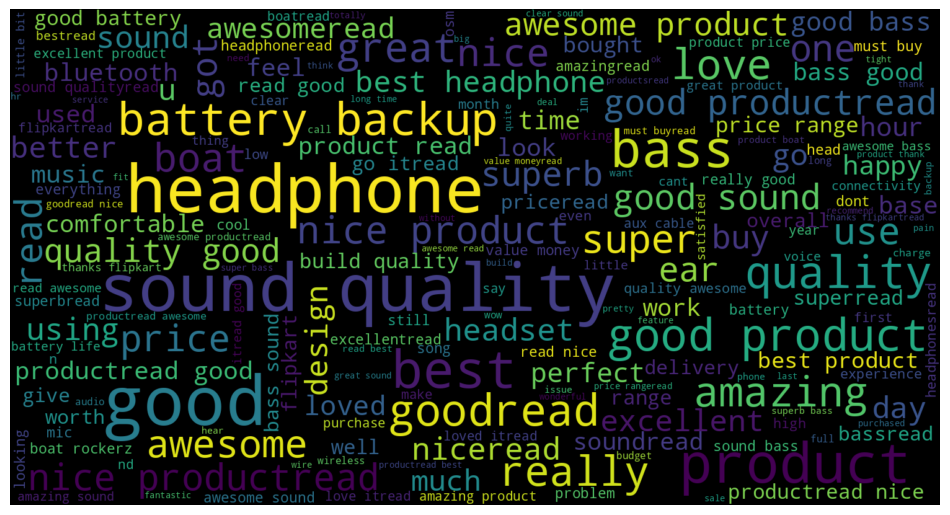

In [22]:
consolidated = ' '.join(
    word for word in data['review'][data['label']==1].astype(str)
)
wordCloud = WordCloud(width=1500,height=800,random_state=21,max_font_size=110)
wordCloud.generate(consolidated)
plt.figure(figsize=(12,10))
plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

####**Here, it's clear that words like awesome, product, battery, quality etc. have high frequency in positive review.**

##**Convert text into Vectors**

####**TF-IDF calculates that how relevant a word in a series or corpus is to a text.**

In [25]:
c_v = TfidfVectorizer(max_features=2500)
X = c_v.fit_transform(data['review']).toarray()
y = data['label'].values

In [26]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

##**Model Training, Evaluation, and Prediction**

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data['label'],test_size=0.2,stratify=data['label'],random_state=42)

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)

#Model Test
pred = model.predict(X_train)
print(accuracy_score(y_train,pred))

0.9209273182957394


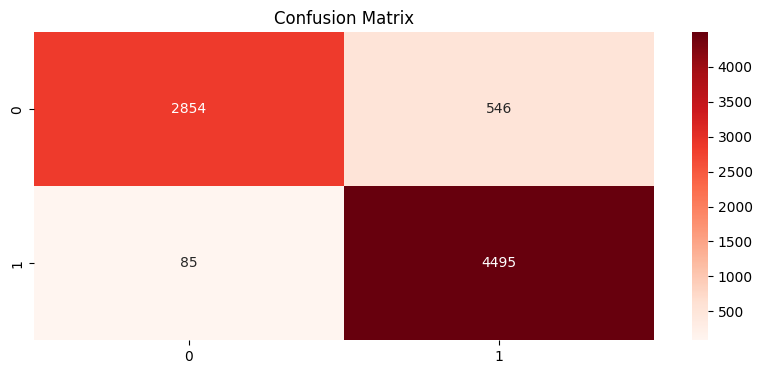

In [32]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train,pred)
cm_display = metrics.confusion_matrix(y_train,pred)
plt.figure(figsize=(10,4))
sns.heatmap(cm_display,annot=True,fmt='d',cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
plt.show()